# Taking a Look at Movies Popularity in the TMDb Movie Dataset 

## Table of Contents
<ul>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#data_understanding">Data Understanding</a></li>
    <li><a href="#data_preparation">Data Preparation</a></li>
    <li><a href="#q1">Question 1:  What years were the top 100 most popular movies were published at?</a></li>
    <li><a href="#q2">Question 2: What are the five top genres for the top 100 popular movies?</a></li>
    <li><a href="#q3">Question 3: How does popularity impact the revenue?</a></li>
    <li><a href="#conclusion">Conclusion</a></li>

</ul>

## Introduction <a class="anchor" id="introduction"></a>
The TMDb dataset contains a set of information on more than 10000 movies. For each movie, the dataset includes information on aspects such as popularity, budget, revenue, cast, directors, production house, date of release, runtime, and its rating.
In this notebook, we're goinig to answer three questions related to movies popularity.

1-  What years were the top 100 most popular movies were published at?

2-  What are the five top genres for the top 100 popular movies?

3-  How does popularity impact the revenue?

In [1]:
#import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


## Data Understanding <a class="anchor" id="data_understanding"></a>

In this section, we will load the data and take some insights.

In [2]:
#Read in the dataset and take a look at the first few rows here:
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
print("Number of rows:" , df.shape[0]) 
print("Number of columns:" , df.shape[1])

Number of rows: 10866
Number of columns: 21


## Data Preparation <a class="anchor" id="data_preparation"></a>
In this section, we will prepare and clean the data for further analysis.

In [6]:
#drop unwanted columns: 
new_df = df[['popularity', 'revenue', 'release_year', 'genres']]
new_df

,popularity,revenue,release_year,genres
0,32.985763,1513528810,2015,Action|Adventure|Science Fiction|Thriller
1,28.419936,378436354,2015,Action|Adventure|Science Fiction|Thriller
2,13.112507,295238201,2015,Adventure|Science Fiction|Thriller
3,11.173104,2068178225,2015,Action|Adventure|Science Fiction|Fantasy
4,9.335014,1506249360,2015,Action|Crime|Thriller
...,...,...,...,...
10861,0.080598,0,1966,Documentary
10862,0.065543,0,1966,Action|Adventure|Drama
10863,0.065141,0,1966,Mystery|Comedy
10864,0.064317,0,1966,Action|Comedy


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   revenue       10866 non-null  int64  
 2   release_year  10866 non-null  int64  
 3   genres        10843 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 339.7+ KB


In [8]:
#How many missing values in the dataset? 
new_df.isna().sum()

popularity       0
revenue          0
release_year     0
genres          23
dtype: int64

In [9]:
#drop null values
new_df = new_df.dropna()

In [10]:
new_df.isna().sum()

popularity      0
revenue         0
release_year    0
genres          0
dtype: int64

In [11]:
#how many diplicated rows?
print(new_df.duplicated().sum()) 

1


In [12]:
#drop diplicated rows
new_df.drop_duplicates(inplace=True)

<ipython-input-12-5cd055261841>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(inplace=True)


In [13]:
new_df.duplicated().sum()

0

In [14]:
#splitting genres column:
new_df['genres'].str.split('|',expand=True)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


In [15]:
new_df = pd.concat([new_df, new_df['genres'].str.split('|',expand=True)], axis=1)
new_df

,popularity,revenue,release_year,genres,0,1,2,3,4
0,32.985763,1513528810,2015,Action|Adventure|Science Fiction|Thriller,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,378436354,2015,Action|Adventure|Science Fiction|Thriller,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,295238201,2015,Adventure|Science Fiction|Thriller,Adventure,Science Fiction,Thriller,None,None
3,11.173104,2068178225,2015,Action|Adventure|Science Fiction|Fantasy,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,1506249360,2015,Action|Crime|Thriller,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,1966,Documentary,Documentary,None,None,None,None
10862,0.065543,0,1966,Action|Adventure|Drama,Action,Adventure,Drama,None,None
10863,0.065141,0,1966,Mystery|Comedy,Mystery,Comedy,None,None,None
10864,0.064317,0,1966,Action|Comedy,Action,Comedy,None,None,None


In [16]:
new_df.columns

Index(['popularity', 'revenue', 'release_year', 'genres', 0, 1, 2, 3, 4], dtype='object')

### Now that we've trimmed and cleaned the data, we're ready to move on to compute statistics and create visualizations with the goal of addressing the research questions.

## Question 1:  What years were the top 100 most popular movies were published at? <a class="anchor" id="q1"></a>

In [20]:
answer1 = new_df[['popularity', 'release_year']].sort_values('popularity', ascending=False).head(100)
answer1

,popularity,release_year
0,32.985763,2015
1,28.419936,2015
629,24.949134,2014
630,14.311205,2014
2,13.112507,2015
...,...,...
22,4.907832,2015
7388,4.878162,2007
5428,4.877927,2013
1923,4.840588,2010


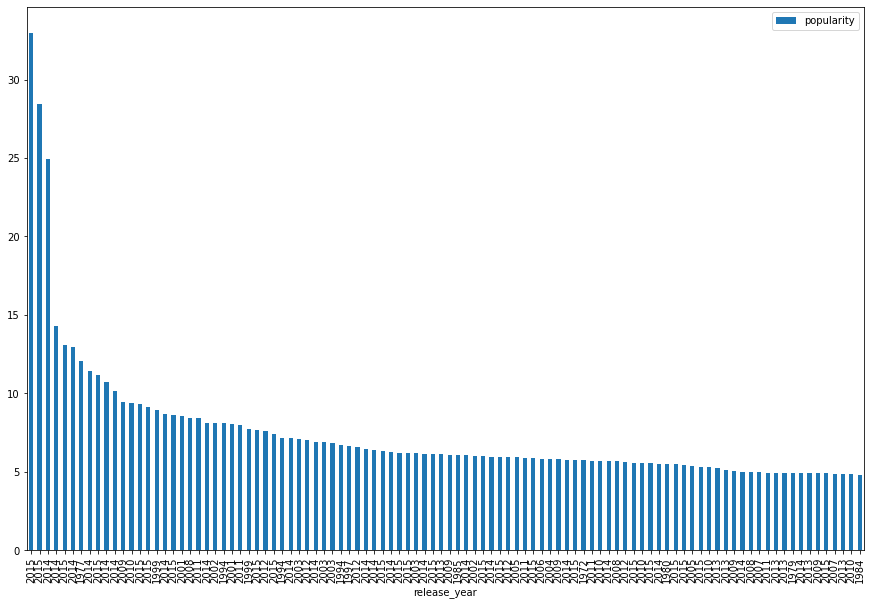

In [21]:
answer1.plot.bar(x='release_year', y='popularity', figsize=(15, 10)); 

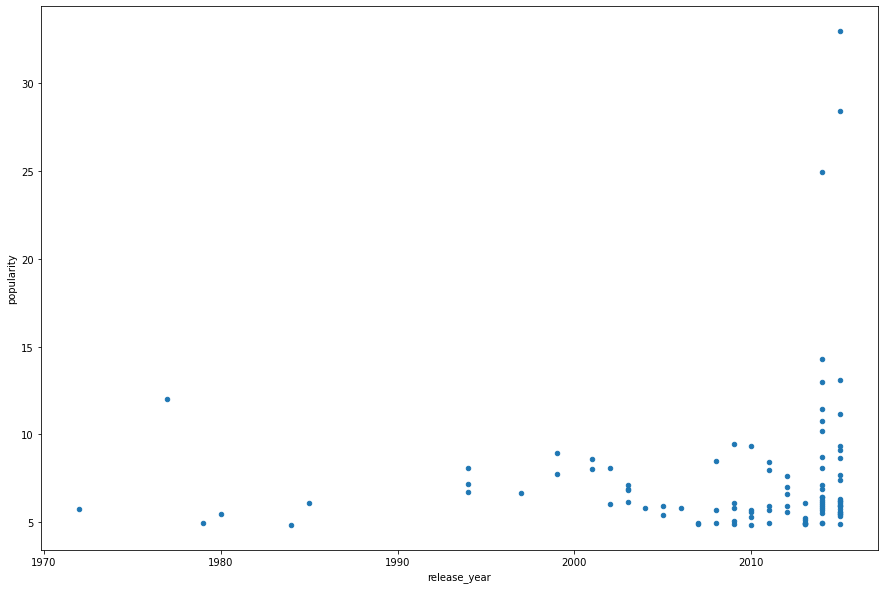

In [26]:
answer1.plot.scatter(x='release_year', y='popularity', figsize=(15, 10)); 

<AxesSubplot:>

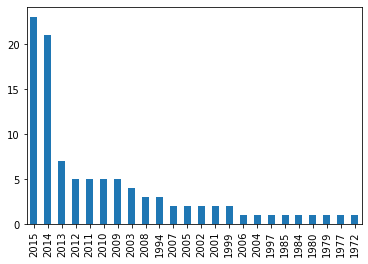

In [23]:
answer1['release_year'].value_counts().plot.bar()

In [30]:
len(answer1[answer1['release_year']>= 2010])/100

0.66

### Finding
We can see that out of the top popular 100 movies, most of them were published in 2015 followed by 2014.
Additionally, 66% of the top movies were published in the years 2010-2015.

## Question2 : What are the five top genres for the top 100 popular movies? <a class="anchor" id="q2"></a>


In [40]:
genres_df = new_df.sort_values(by=['popularity'], ascending=False).head(100)[[0,1,2,3,4]]
genres_df

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
629,Adventure,Drama,Science Fiction,None,None
630,Action,Science Fiction,Adventure,None,None
2,Adventure,Science Fiction,Thriller,None,None
...,...,...,...,...,...
22,Action,Drama,Thriller,None,None
7388,Adventure,Fantasy,Family,Mystery,None
5428,Crime,Drama,Comedy,None,None
1923,Adventure,Fantasy,Family,None,None


In [41]:
genres_df = genres_df.stack().str.get_dummies().sum(level=0)
genres_df

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
629,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
630,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7388,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
5428,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1923,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

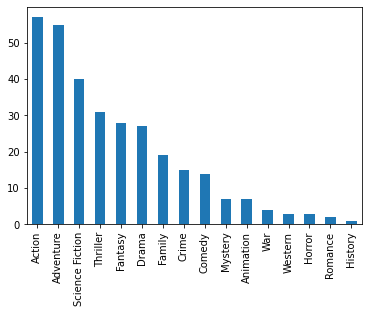

In [46]:
genres_df.sum().sort_values(ascending=False).plot.bar()

### Finding
We find that the 5 top popular genres are Action, Adeventure, Science Fiction,Thriller and Fantasy.

## Question3: How does popularity impact the revenue? <a class="anchor" id="q3"></a>

In [51]:
answer3 = new_df[['popularity', 'revenue']].sort_values(by='popularity')
answer3

,popularity,revenue
6181,0.000065,0
9977,0.000188,0
6080,0.000620,0
6551,0.000973,0
6961,0.001115,0
...,...,...
2,13.112507,295238201
630,14.311205,773312399
629,24.949134,621752480
1,28.419936,378436354


<AxesSubplot:xlabel='popularity'>

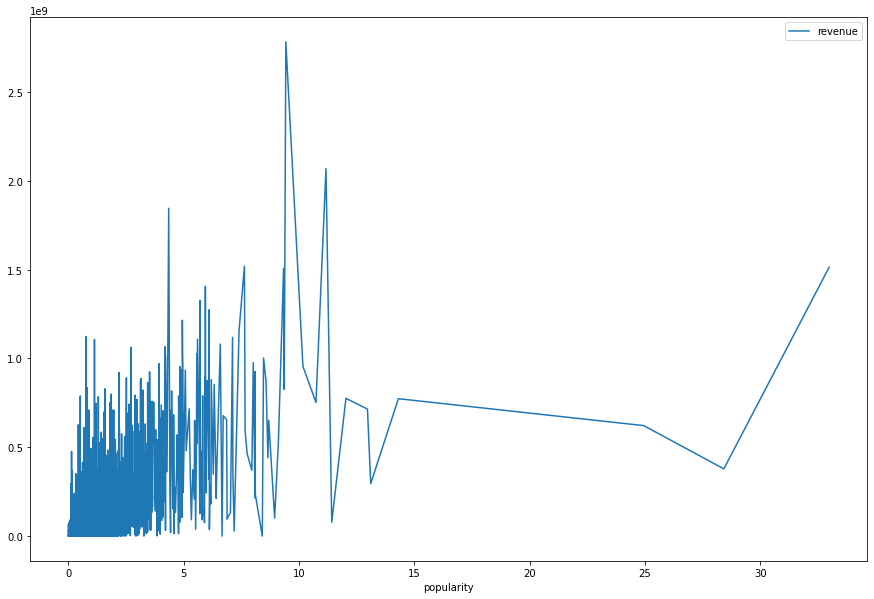

In [54]:
answer3.plot.line(x='popularity', y='revenue', figsize=(15,10))

In [55]:
answer3.corr()

,popularity,revenue
popularity,1.000000,0.663268
revenue,0.663268,1.000000


### Finding
We found that there is not clear correlation between the movie popularity and revenue.

# Conclusion <a class="anchor" id="conclusion"></a>
To conclude, we found that out of the top popular 100 movies, most of them were published in 2015 followed by 2014. Additionally, 66% of the top movies were published in the years 2010-2015. Also, we found that the 5 top popular genres are Action, Adeventure, Science Fiction,Thriller and Fantasy. Finally, we found that there is not clear correlation between the movie popularity and revenue.